# DSCI 100

 # Introduction

In this project, we take the data set of about 300 patients with heart diseases and use it to establish a relationship between the presence of heart disease and many different factors. We will first clean and wrangle our data and then develop an exploratory analysis on it. We will utilize bar graphs, histograms and various other visualization tools. We will attempt to develop a relationship between the presence of heart diseases and factors (that we will determine using randomForest plot below) using classification kknn model. Moreover, we will split our dataset into training and testing datasets to test our model's accuracy.


In this project, we are trying to answer the question of what factors or variables will lead to higher chances of being diagnosed with heart diseases. In summary, the research question that we're trying to answer is whether we can use the kknn classification model to determine what factors or variables will lead to higher chances of being diagnosed with heart diseases. For example, high cholesterol or high blood pressure could be factors that increase the likelihood of having heart 
disease.



# Loading Required Libraries and Dataset

We start by loading the dataset here. We have 14 variables namely 
- age 
- sex 
- cp (chest pain type 
        --Value 1: typical angina
        -- Value 2: atypical angina
        -- Value 3: non-anginal pain
        -- Value 4: asymptomatic"),

- trestbps(The person's resting blood pressure mm Hg)

- Chol (cholesterol levels mg/dl)

- fbs (fasting blood sugar level less than 100 mg/dL (5.6 mmol/L) is normal)

- Restecg (resting electrocardiographic results Value 0: showing probable or definite left ventricular hypertrophy by Estes’ criteria Value 1: normal Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV))

- Thalach (The person’s maximum heart rate achieved)

- exang( Exercise induced angina (1 = yes; 0 = no)) 

- Oldpeak (ST depression induced by exercise relative to rest)

- Slope (the slope of the peak exercise ST segment — 0: downsloping; 1: flat; 2: upsloping)

- Ca (The number of major vessels (0–3))

- Thal (A blood disorder called thalassemia 
            - Value 0: NULL 
            - Value 1: fixed defect (no blood flow in some part of the heart) 
            - Value 2: normal blood flow 
            - Value 3: reversible defect (a blood flow is observed but it is not normal))

- Num (Heart disease (1 = no, 0= yes))

References:
https://www.mayoclinic.org/diseases-conditions/diabetes/diagnosis-treatment/drc-20371451
https://towardsdatascience.com/heart-disease-uci-diagnosis-prediction-b1943ee835a7




In [18]:
library(tidyverse)
library(readr)
library(tidymodels)
library(ggplot2)
library(repr)
library(GGally)
install.packages("randomForest")

df<-read_table("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data",col_names = FALSE)
df1<-separate(df,X1,sep = ",",into =c("age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca",'thal','num'))


df1$age<-as.numeric(df1$age)
df1$sex<-as.factor(df1$sex)
df1$cp<-as.factor(df1$cp)
df1$trestbps<-as.numeric(df1$trestbps)
df1$chol<-as.numeric(df1$chol)
df1$fbs<-as.factor(df1$fbs)
df1$restecg<-as.factor(df1$restecg)
df1$thalach<-as.numeric(df1$thalach)
df1$exang<-as.factor(df1$exang)
df1$oldpeak<-as.numeric(df1$oldpeak)
df1$slope<-as.factor(df1$slope)
df1$ca<-as.factor(df1$ca)
df1$thal<-as.factor(df1$thal)
df1$num<-as.factor(df1$num)

head(df1)


The downloaded binary packages are in
	/var/folders/_k/lgvt5y7s27s5sjx50fwzd3jr0000gn/T//Rtmpa7Xu9H/downloaded_packages



── Column specification ────────────────────────────────────────────────────────
cols(
  X1 = col_character()
)



age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>
63,1.0,1.0,145,233,1.0,2.0,150,0.0,2.3,3.0,0.0,6.0,0
67,1.0,4.0,160,286,0.0,2.0,108,1.0,1.5,2.0,3.0,3.0,2
67,1.0,4.0,120,229,0.0,2.0,129,1.0,2.6,2.0,2.0,7.0,1
37,1.0,3.0,130,250,0.0,0.0,187,0.0,3.5,3.0,0.0,3.0,0
41,0.0,2.0,130,204,0.0,2.0,172,0.0,1.4,1.0,0.0,3.0,0
56,1.0,2.0,120,236,0.0,0.0,178,0.0,0.8,1.0,0.0,3.0,0


To test the accuracy of our model, we split our data into testing and training data. Here 70% of our data will be used to generate our classification model, while 30% will be used to test the model.

In [19]:
set.seed(123)
df_splited<-initial_split(df1,prop=0.7,strata=num)
train_set <- training(df_splited)
test_set <- testing(df_splited)

head(train_set)
head(test_set)
nrow(train_set)
nrow(test_set)

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>
56,1.0,2.0,120,236,0.0,0.0,178,0.0,0.8,1.0,0.0,3.0,0
57,0.0,4.0,120,354,0.0,0.0,163,1.0,0.6,1.0,0.0,3.0,0
57,1.0,4.0,140,192,0.0,0.0,148,0.0,0.4,2.0,0.0,6.0,0
56,0.0,2.0,140,294,0.0,2.0,153,0.0,1.3,2.0,0.0,3.0,0
44,1.0,2.0,120,263,0.0,0.0,173,0.0,0.0,1.0,0.0,7.0,0
52,1.0,3.0,172,199,1.0,0.0,162,0.0,0.5,1.0,0.0,7.0,0


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>
63,1.0,1.0,145,233,1.0,2.0,150,0.0,2.3,3.0,0.0,6.0,0
37,1.0,3.0,130,250,0.0,0.0,187,0.0,3.5,3.0,0.0,3.0,0
41,0.0,2.0,130,204,0.0,2.0,172,0.0,1.4,1.0,0.0,3.0,0
63,1.0,4.0,130,254,0.0,2.0,147,0.0,1.4,2.0,1.0,7.0,2
56,1.0,3.0,130,256,1.0,2.0,142,1.0,0.6,2.0,1.0,6.0,2
57,1.0,3.0,150,168,0.0,0.0,174,0.0,1.6,1.0,0.0,3.0,0


[1] 210

[1] 93

Here we utilize ggapairs to look at the overview of relationships between the different variables

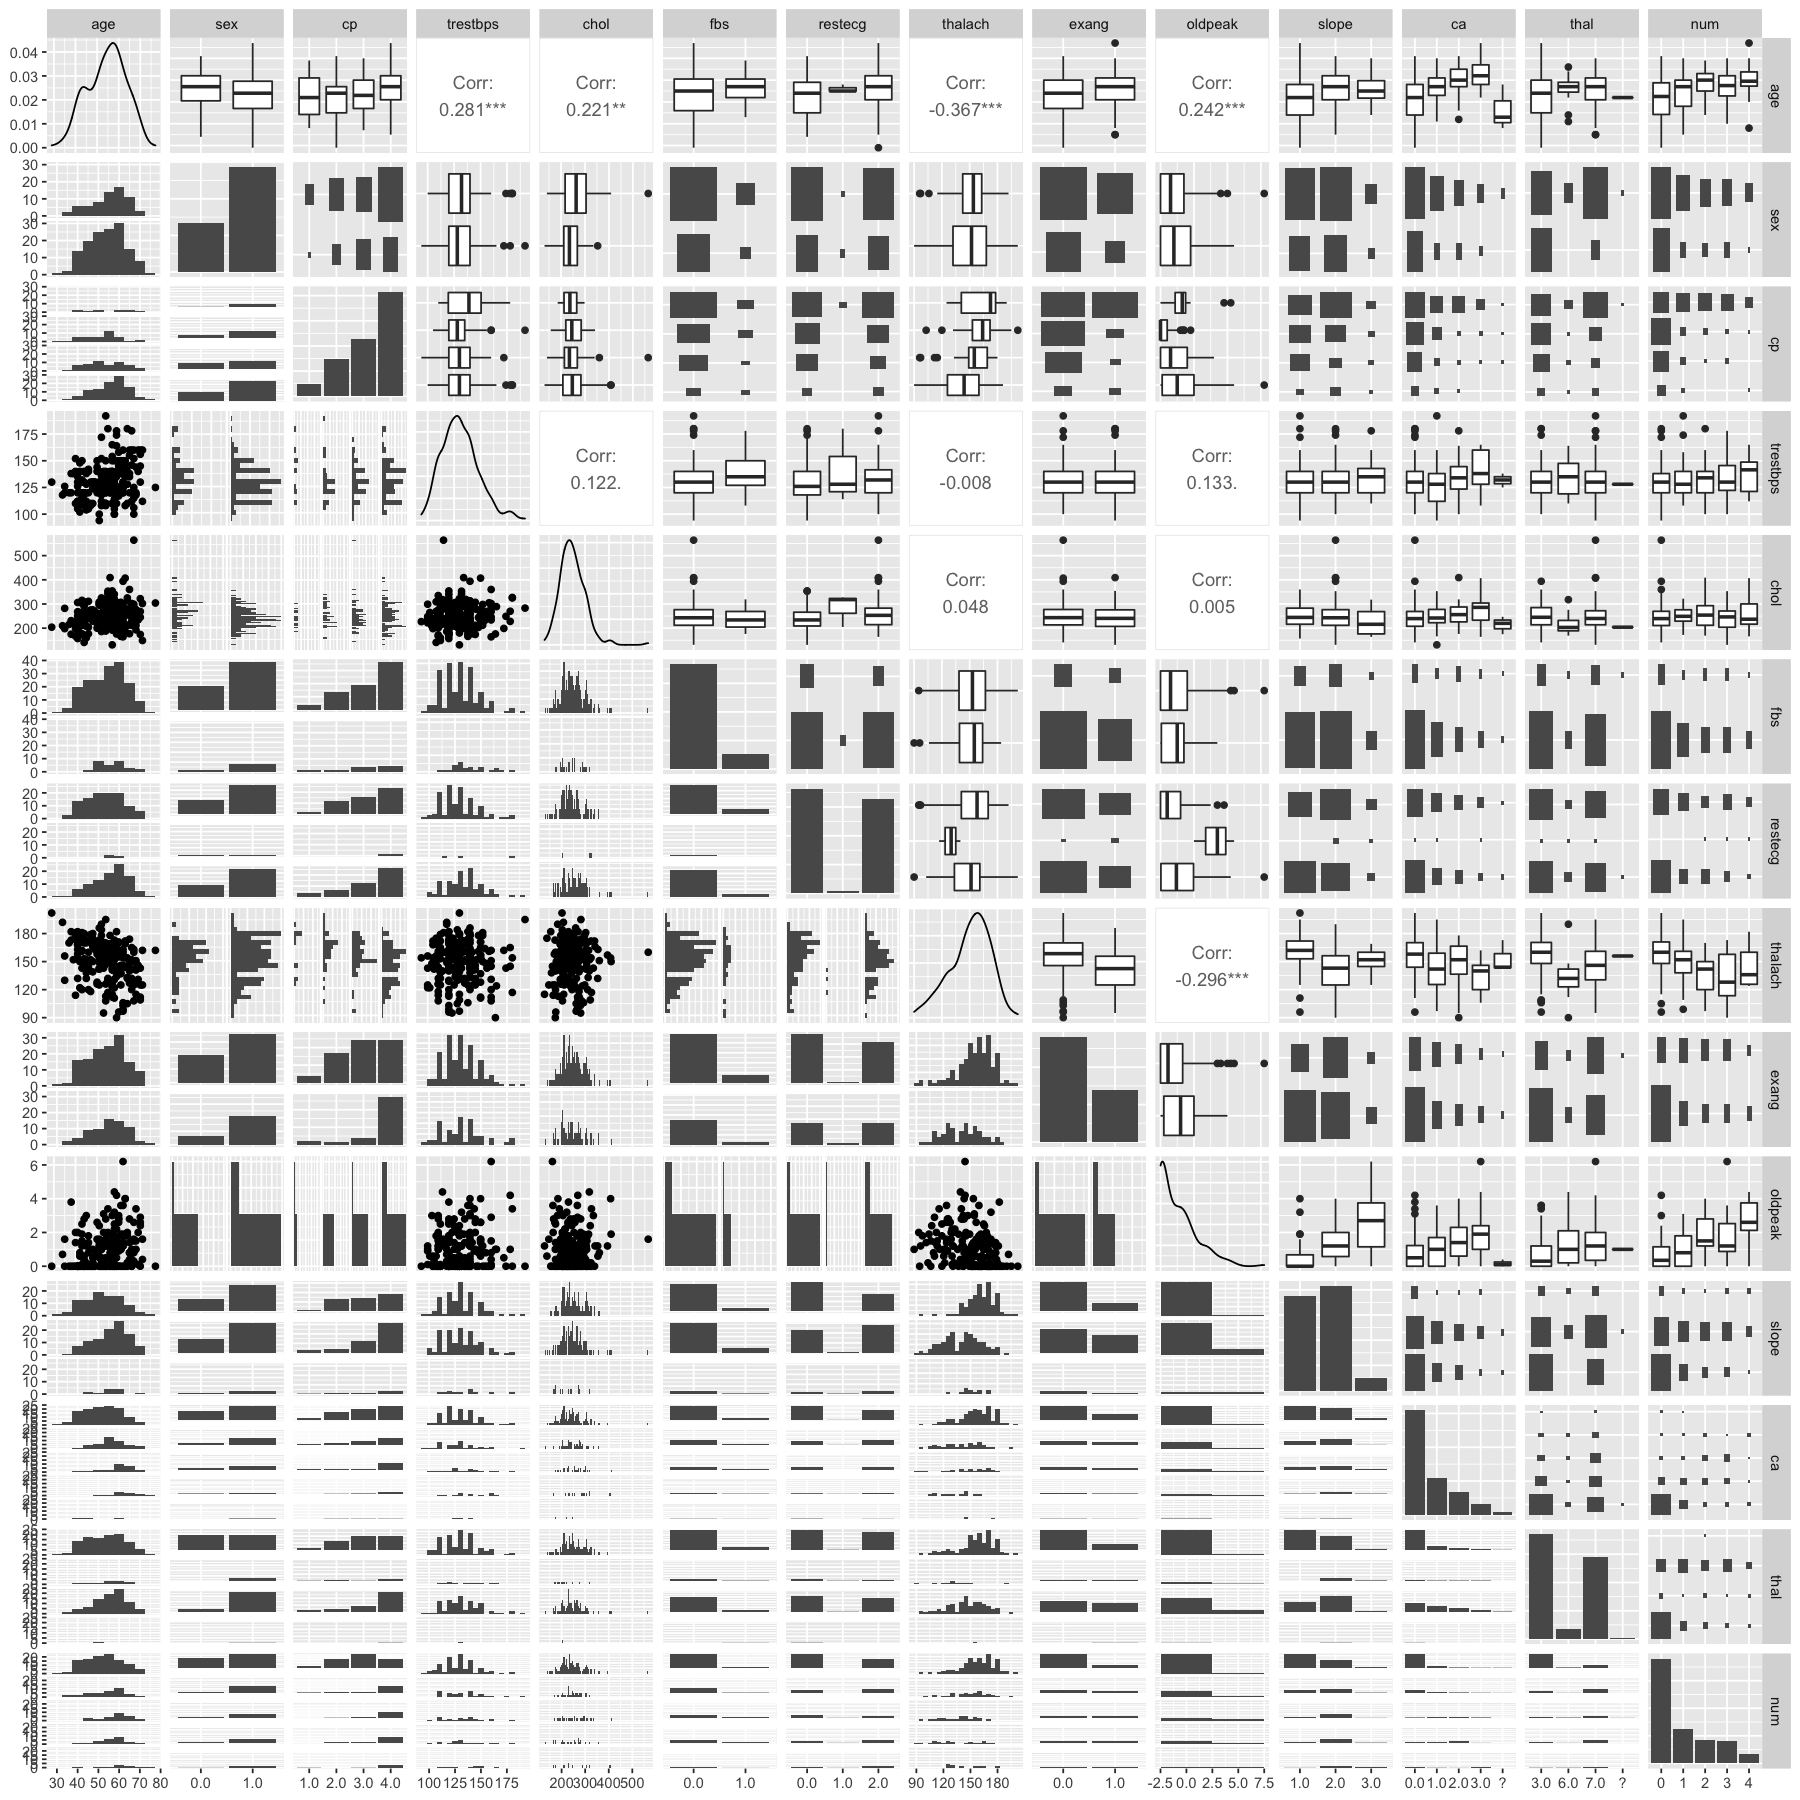

In [20]:
options(repr.plot.height = 15, repr.plot.width = 15)
train_set%>%ggpairs(lower=list(combo=wrap("facethist", binwidth=5)))

### Variable selection
We do the variable selection through the variable importance plot from the random forest library. This plot shows us that removing which variable decreases the accuracy of our model. Therefore we use the variables such that removing them would cause the greatest decrease in accuracy (ie, the most important variables.)
We select the best 6 variables from the mean decrease accuracy which is thal,ca,cp,slope,oldpeak and exang.

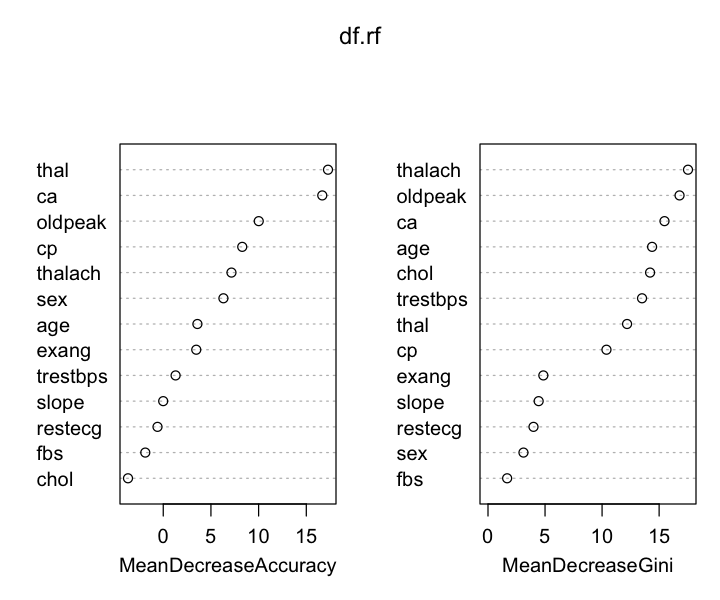

In [23]:
library(randomForest)
df.rf <- randomForest(data=train_set, num~ . , importance=TRUE, keep.forest=TRUE)

varImpPlot(df.rf)

## KNN crossvalidation
For our model, we will be building a kknn nearest neighbours model to use classification. As mentioned above, we will be using a classification model to check whether cholestrol, age and heartrate 
* In this step we made 5 fold cross validation to choose the best K 

In [24]:
set.seed(123) 

options(repr.plot.height = 5, repr.plot.width = 6)

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
            set_engine("kknn") %>%
            set_mode("classification")

df_recipe <- recipe(num ~thal+ca+cp+slope+oldpeak+exang, data = train_set)%>%step_scale(oldpeak) %>%
             step_center(oldpeak)

df_vfold <- vfold_cv(train_set, v = 5, strata = num)

knn_results <- workflow() %>%
                 add_recipe(df_recipe) %>%
                 add_model(knn_spec) %>%
                 tune_grid(resamples = df_vfold, grid = 10) %>%
                 collect_metrics()

accuracies <- knn_results %>%
                 filter(.metric == 'accuracy')

cross_val_plot <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
                  geom_point() +
                  geom_line() +
                  labs(x = 'Neighbors', y = 'Accuracy Estimate') +
                  theme(text = element_text(size = 20))+
                  scale_x_continuous(breaks = seq(0, 20, 2)) +
                  scale_y_continuous(limits = c(0.5, 0.65))

cross_val_plot

ERROR: [1m[33mError[39m in [1m[1m`check_installs()`:[22m
[33m![39m Some package installs are required: 
[36m•[39m 'kknn', 'kknn'


## Best KNN model with best 6 variable

In [ ]:
set.seed(123)

df_knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 8) %>% set_engine("kknn") %>% set_mode("classification")

df_selected_recipe<-recipe(num ~thal+ca+cp+slope+oldpeak+exang, data = train_set)%>%step_scale(oldpeak) %>%
               step_center(oldpeak)

df_knn_fit <- workflow() %>% add_recipe(df_selected_recipe) %>% add_model(df_knn_spec) %>% fit(data = train_set)

df_prediction <- predict(df_knn_fit, test_set)%>%
                        bind_cols(test_set)

df_metrics <- df_prediction %>% metrics(truth = num, estimate = .pred_class)

df_conf_mat <- df_prediction %>%
                        conf_mat(truth = num, estimate = .pred_class) 
df_metrics

df_conf_mat

knn_accuracy<-df_metrics%>%slice(1)%>%pull()
knn_accuracy

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.5393258
kap,multiclass,0.2490224


          Truth
Prediction  0  1  2  3  4
         0 42  7  2  2  1
         1  5  2  4  2  1
         2  1  1  2  3  1
         3  1  4  3  2  1
         4  0  1  0  1  0

[1] 0.5393258

## Setting the tuning parameters for random forest model

In [ ]:
reps=5
varz = c(1,2,3,4,6)
nodez = c(1,3,5,7,10)

NS = length(nodez)
M = length(varz)
rf.oob = matrix(NA, nrow=M*NS, ncol=reps)

for(r in 1:reps){
  print(paste0(r, "of", reps))
  counter=1
  for(m in varz){
    for(ns in nodez){
      df.rfm <- randomForest(data=train_set, num~thal+ca+cp+slope+oldpeak+exang, 
                              mtry=m, nodesize=ns)
      rf.oob[counter,r] = mean(predict(df.rfm, type="response") != train_set$num)
      counter=counter+1
    }
  }
}

[1] "1of5"
[1] "2of5"
[1] "3of5"
[1] "4of5"
[1] "5of5"


4|10      6|10       6|7       1|5       2|1       4|7      1|10       1|3 
0.4018692 0.4018692 0.4046729 0.4074766 0.4074766 0.4093458 0.4102804 0.4112150 
      3|7       1|7      3|10       4|5      2|10       4|1       2|7       3|3 
0.4112150 0.4121495 0.4130841 0.4130841 0.4140187 0.4140187 0.4149533 0.4149533 
      6|5       1|1       3|1       2|3       3|5       6|1       4|3       2|5 
0.4168224 0.4177570 0.4186916 0.4196262 0.4196262 0.4196262 0.4214953 0.4233645 
      6|3 
0.4299065

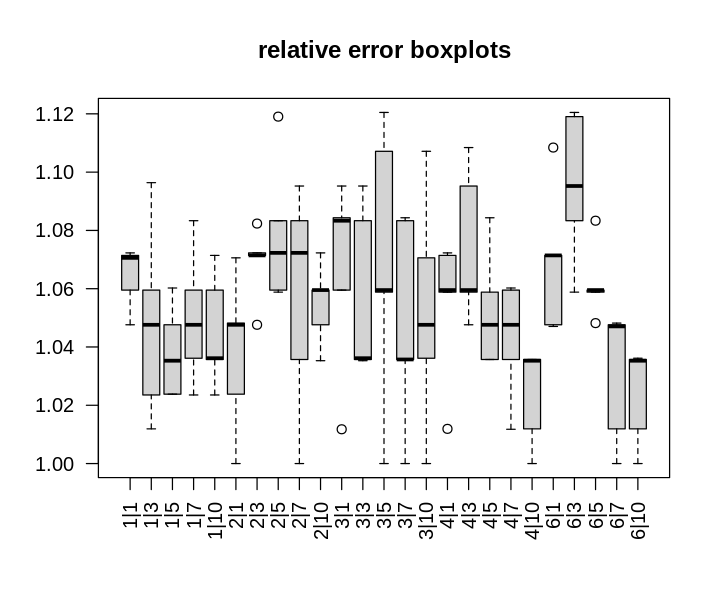

In [ ]:
parms = expand.grid(nodez,varz)
row.names(rf.oob) = paste(parms[,2], parms[,1], sep="|")

mean.oob = apply(rf.oob, 1, mean)
mean.oob[order(mean.oob)]

min.oob = apply(rf.oob, 2, min)


boxplot(t(rf.oob)/min.oob, use.cols=TRUE, las=2, 
        main="relative error boxplots")


Attaching package: ‘e1071’


The following object is masked from ‘package:tune’:

    tune





Parameter tuning of ‘randomForest’:

- sampling method: 5-fold cross validation 

- best parameters:
 mtry nodesize
    4       10

- best performance: 0.3882614 

- Detailed performance results:
   mtry nodesize     error dispersion
1     1        1 0.4209302 0.08156129
2     2        1 0.4068660 0.05436292
3     3        1 0.4115172 0.05656845
4     4        1 0.4395349 0.05600742
5     5        1 0.4303433 0.06494051
6     6        1 0.4397564 0.06540624
7     1        2 0.4162791 0.08870805
8     2        2 0.4115172 0.04298729
9     3        2 0.4068660 0.08690458
10    4        2 0.4115172 0.06543436
11    5        2 0.4256921 0.07445534
12    6        2 0.4491694 0.08101818
13    1        3 0.4162791 0.08870805
14    2        3 0.4161683 0.04805104
15    3        3 0.4021041 0.07033903
16    4        3 0.4067553 0.05043260
17    5        3 0.4069767 0.08139535
18    6        3 0.4209302 0.07463631
19    1        4 0.4116279 0.09066785
20    2        4 0.4208195 0.04042461
21   

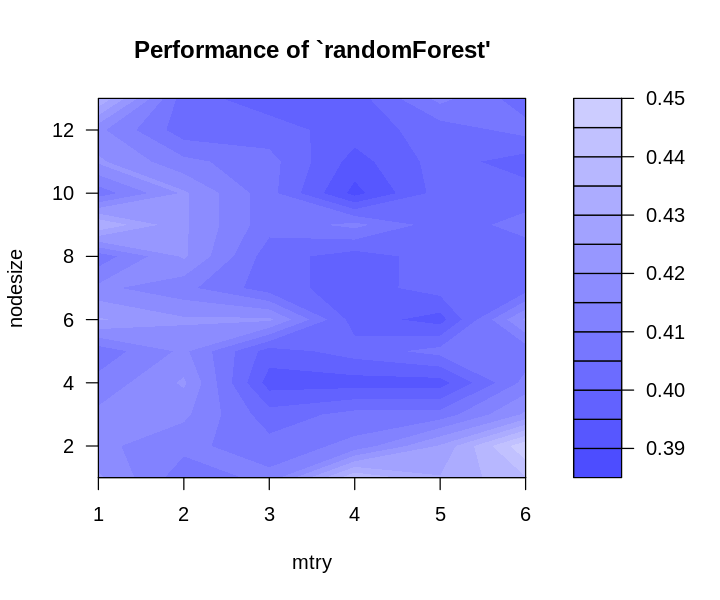

In [ ]:
library("e1071")
set.seed(123)
tuning <- tune(randomForest, num~thal+ca+cp+slope+oldpeak+exang, data = train_set,ranges = list(mtry=(1:6), nodesize=(1:13)),tunecontrol = tune.control(cross=5))
summary(tuning)
plot(tuning)

## Random forest model with mtry=6 and nodesize=10

In [ ]:
set.seed(123)
df.rf <- randomForest(data=train_set, num~ thal+ca+cp+slope+oldpeak+exang , mtry=6, nodesize=10,  importance=TRUE, keep.forest=TRUE)


df_prediction <- predict(df.rf, test_set)%>%
                        bind_cols(test_set)

df_metrics <- df_prediction %>% metrics(truth = num, estimate = `...1`)

df_conf_mat <- df_prediction %>%
                        conf_mat(truth = num, estimate = `...1`) 
df_metrics

df_conf_mat

rf_610_accuracy<-df_metrics%>%slice(1)%>%pull()
rf_610_accuracy

New names:
* NA -> ...1



.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.5280899
kap,multiclass,0.2472815


          Truth
Prediction  0  1  2  3  4
         0 40  6  3  1  0
         1  7  3  4  5  2
         2  1  2  3  3  1
         3  1  4  1  1  1
         4  0  0  0  0  0

[1] 0.5280899

## Random forest model with mtry=4 and nodesize=10

In [ ]:
set.seed(123)

df.rf <- randomForest(data=train_set, num~ thal+ca+cp+slope+oldpeak+exang , mtry=4, nodesize=10,  importance=TRUE, keep.forest=TRUE)


df_prediction <- predict(df.rf, test_set)%>%
                        bind_cols(test_set)

df_metrics <- df_prediction %>% metrics(truth = num, estimate = `...1`)

df_conf_mat <- df_prediction %>%
                        conf_mat(truth = num, estimate = `...1`) 
df_metrics

df_conf_mat

rf_410_accuracy<-df_metrics%>%slice(1)%>%pull()
rf_410_accuracy

New names:
* NA -> ...1



.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.4943820
kap,multiclass,0.1809816


          Truth
Prediction  0  1  2  3  4
         0 40  6  4  2  0
         1  7  3  4  5  2
         2  1  2  1  3  1
         3  1  4  2  0  1
         4  0  0  0  0  0

[1] 0.494382

## Logistic regression

In [ ]:
library(nnet)

logis_mod <- multinom(data=train_set, formula=num ~ ., trace=TRUE)

df_prediction <- predict(logis_mod, test_set)%>%
                        bind_cols(test_set)

df_metrics <- df_prediction %>% metrics(truth = num, estimate = `...1`)

df_conf_mat <- df_prediction %>%
                        conf_mat(truth = num, estimate = `...1`) 
df_metrics

df_conf_mat

lg_accuracy<-df_metrics%>%slice(1)%>%pull()
lg_accuracy

# weights:  120 (92 variable)
initial  value 344.419713 
iter  10 value 259.324414
iter  20 value 187.425853
iter  30 value 130.675315
iter  40 value 120.632485
iter  50 value 117.046463
iter  60 value 114.374610
iter  70 value 113.412631
iter  80 value 113.062384
iter  90 value 112.986965
iter 100 value 112.907746
final  value 112.907746 
stopped after 100 iterations


New names:
* NA -> ...1



.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.4719101
kap,multiclass,0.1965040


          Truth
Prediction  0  1  2  3  4
         0 36  6  1  1  0
         1  7  4  6  6  3
         2  4  2  1  1  1
         3  1  2  1  1  0
         4  1  1  2  1  0

[1] 0.4719101

## Tuning parameters for SVM


Parameter tuning of ‘svm’:

- sampling method: 5-fold cross validation 

- best parameters:
   gamma cost
 0.03125    4

- best performance: 0.3741971 

- Detailed performance results:
           gamma cost     error dispersion
1   9.765625e-04    4 0.4630122 0.12444831
2   1.953125e-03    4 0.4630122 0.12444831
3   3.906250e-03    4 0.4210410 0.12865005
4   7.812500e-03    4 0.4117386 0.11859840
5   1.562500e-02    4 0.3977852 0.08177453
6   3.125000e-02    4 0.3741971 0.06028372
7   6.250000e-02    4 0.3741971 0.06248635
8   1.250000e-01    4 0.3789590 0.07409126
9   2.500000e-01    4 0.4163898 0.07836511
10  5.000000e-01    4 0.4304540 0.07927300
11  1.000000e+00    4 0.4349945 0.08463759
12  2.000000e+00    4 0.4396456 0.09473133
13  4.000000e+00    4 0.4537099 0.10744511
14  8.000000e+00    4 0.4584718 0.11303007
15  1.600000e+01    4 0.4491694 0.12225733
16  3.200000e+01    4 0.4491694 0.12225733
17  6.400000e+01    4 0.4491694 0.12225733
18  1.280000e+02    4 0.4491694 0.122257

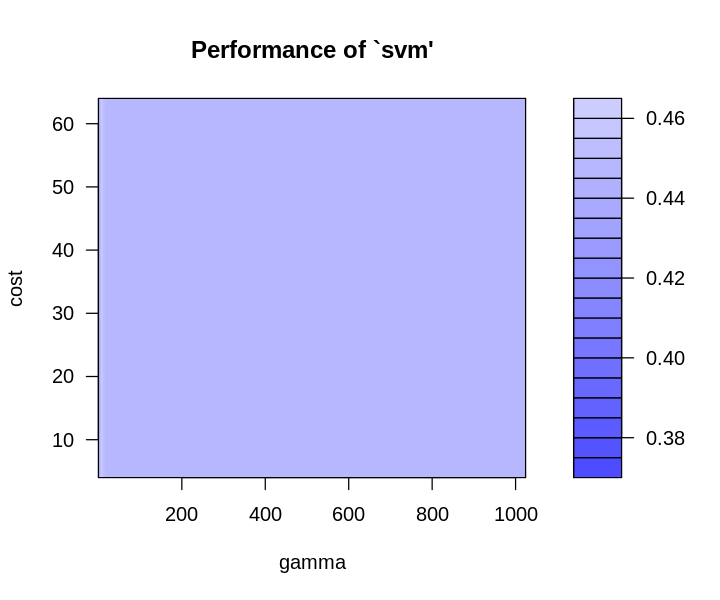

In [ ]:
library("e1071")
set.seed(123)
tuning <- tune(svm, num~thal+ca+cp+slope+oldpeak+exang, data = train_set,ranges = list(gamma = 2^(-10:10), 
                                                          cost = 2^(2:6)),tunecontrol = tune.control(cross=5))
summary(tuning)
plot(tuning)

## Support Vector machine with best 6 variables

In [ ]:
set.seed(123)

svm_mod <- svm(data=train_set, num ~ thal+ca+cp+slope+oldpeak+exang , kernel="radial", 
               gamma=0.03125 , cost=4)

df_prediction <- predict(svm_mod, test_set)%>%
                        bind_cols(test_set)

df_metrics <- df_prediction %>% metrics(truth = num, estimate = `...1`)

df_conf_mat <- df_prediction %>%
                        conf_mat(truth = num, estimate = `...1`) 
df_metrics

df_conf_mat

svm_accuracy<-df_metrics%>%slice(1)%>%pull()
svm_accuracy

New names:
* NA -> ...1



.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.5505618
kap,multiclass,0.2618702


          Truth
Prediction  0  1  2  3  4
         0 42  7  4  1  0
         1  5  4  4  4  2
         2  1  2  0  2  2
         3  1  2  3  3  0
         4  0  0  0  0  0

[1] 0.5505618

We make a table to compare which model has the best performance

In [ ]:
tibble(knn_accuracy,rf_610_accuracy,rf_410_accuracy,lg_accuracy,svm_accuracy)

knn_accuracy,rf_610_accuracy,rf_410_accuracy,lg_accuracy,svm_accuracy
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.5393258,0.5280899,0.494382,0.4719101,0.5505618


Through the table above that we found out all the model has the similar performance and svm model has the highest accuracy.